Life cycle of the data science projects

1. Data collection straytegy - from company server,3rd party API's,Surveys

2. Feature Engineering
    a.handling missing values
    
    Why data is missing
    1.Survey informations are not that valid
    2.Theey hesitate to put down the information
    
Data science Projects - so data will be coming multiple sources\

Data that will be missing

a.Continous Data
b.Categorical Data





#### What are the different types of missing data?

##### Missing completely at random MCAR

A variable is missing completelt at random(MCAR) if the probability of being missing is same for all observations.When data is MCAR , there is absolutely no relationship between the data missing and other values,observed or missing , within the dataset.In other words ,those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

#### Missing Data not random(MNAR) : Systematic missing values

there is some relationship between the data missing and other values,observed or missing , within the dataset

#### Missing At Random(MAR):

Men : hiding their salary

Women : hiding their age






In [1]:
import pandas as pd

In [5]:
data = pd.read_csv("/home/shivasai7392/Desktop/DS/Assignments/Kaggle/Titanic/train.csv")

In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
Embarked is MCAR
Age,Cabin : MDNR
men hiding their salary : MAR

### All techniques of handling missing values

1. Mean , Median , Mode replacement

2.Random sample Imputation

3.capturing Nan values with new feature

4.End of Distribution imputation

5.Arbitrary imputation

6.Frequent categories imputation


#### Mean , Median , Mode imputation

When we should apply this

this impuatation hast teh assumption that data is missing completely at random

solve this by replacing the Nan with the most frequent occurance of the variables

In [8]:
data = pd.read_csv("/home/shivasai7392/Desktop/DS/Assignments/Kaggle/Titanic/train.csv",usecols=["Age","Fare","Survived"])

In [9]:
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [11]:
data.isna().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [12]:
data.isna().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [13]:
data.Age.median()

28.0

In [14]:
data["Age_median"] = data.Age.fillna(data.Age.median())

In [15]:
data.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [16]:
print(data.Age.std())
print(data.Age_median.std())

14.526497332334042
13.019696550973201


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline


<Figure size 432x288 with 0 Axes>

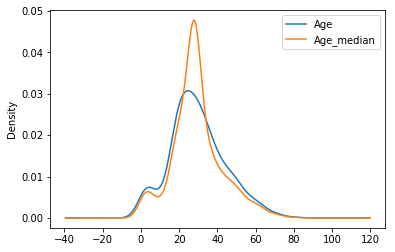

In [20]:
fig = plt.figure()
ax= fig.add_subplot(111)
data.Age.plot(kind="kde",ax=ax)
data.Age_median.plot(kind="kde",ax=ax)
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc ="best")

#### Mean,Median ,Mode Advantages and Disadvantages

Advantages:
    
    1.very easy to implement(Robust to outliers)
    
    2.faster way to obtain the complete dataset
    
Disadvantages:
    
    1.change or distortion in the original variance
    
    2.Impacts Correlation
    